<center><h1>Motivation</h1></center>

<p>
    In this project, we are going to create a Convolutional Neural Network (CNN) model that can predict if a patient has or not pneumonia based on X-ray images. Our main motivation is to facilitate pneumonia recognition by increasing speed and also by increasing the accuracy. With that, we will create diagnosis more precisely. Therefore, we will split this project in these parts:
</p>

<ol>
    <li>Importing libraries;</li>
    <li>Reading the dataset:
        <ol>
            <li>Understanding the dataset;</li>
            <li>Preprocessing the training set;</li>
            <li>Preprocessing the test set;</li>
        </ol>
    </li>
    <li>Creating the CNN model;</li>
    <li>Training the CNN model:
        <ol>
            <li>Training;</li>
            <li>About the results;</li>
        </ol>
    </li>
    <li>Making predictions:
        <ol>
            <li>predict_image;</li>
            <li>For healthy lungs;</li>
            <li>For unhealthy lungs;</li>
            <li>Analising the whole test set.</li>
        </ol>
    </li>
    <li>Exporting the model;</li>
</ol>

<h2>1. Importing libraries:</h2>

In [49]:
#to manipulate the data
import numpy as np

#to handle paths
import pathlib

#to read, clean and change data:
import pandas as pd

#to visualize the data:
import matplotlib.pyplot as plt

#to manipulate test and train images to our future model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#to create and configure our CNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

#to import images
from keras.preprocessing import image

#to evaluate our future model:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#to export our future model:
import joblib

<h2>2. Reading the dataset</h2>

<h3>2.1 Understanding the dataset:</h3>

<p>Unlike others datasets, when we are talking about image recognition, our data consists only of images separates in different folders. Also, in this project, each folder has 2 others folders:</p>

<ol>
    <li>train:
        <ul>
            <li>NORMAL;</li>
            <li>PNEUMONIA;</li>
        </ul>
    </li>
    <li>test:
        <ul>
            <li>NORMAL;</li>
            <li>PNEUMONIA;</li>
        </ul>
    </li>
    <li>pred:
        <ul>
            <li>NORMAL;</li>
            <li>PNEUMONIA;</li>
        </ul>
    </li>
</ol>

<p>Then, since we cannot look to every single image, in order to have a feeling about our data, we will have a briefly look to the x-ray images. Therefore, we are going to create a function called <code>show_image</code> just to show the first 5 images from the dataset:</p>

In [2]:
def show_image(path, category, n):

    fig, ax = plt.subplots(1, n, figsize = (15, 10))

    for i in range (0, n):

        ax1 = ax[i]

        current_image = image.load_img(
            fr"{path}/{category}_{i}.jpeg"
        )

        ax1.set_axis_off()
        ax1.set_title(f"x-ray{i + 1} {category.lower()}")
        ax1.imshow(current_image)

    plt.show()

<h4>Normal lungs:</h4>

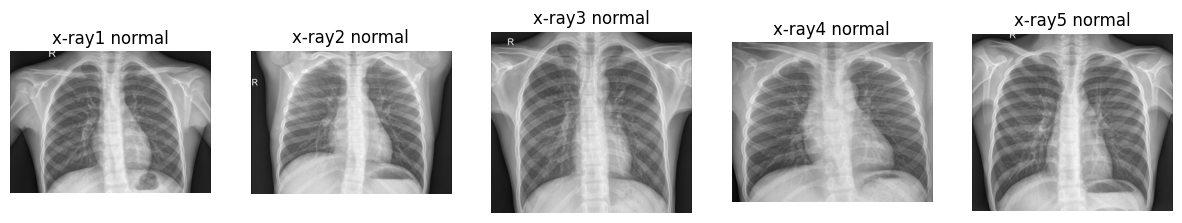

In [3]:
show_image(
    path = fr"./dataset/train/NORMAL",
    category = "NORMAL",
    n = 5
)

<h4>Lungs with pneumonia:</h4>

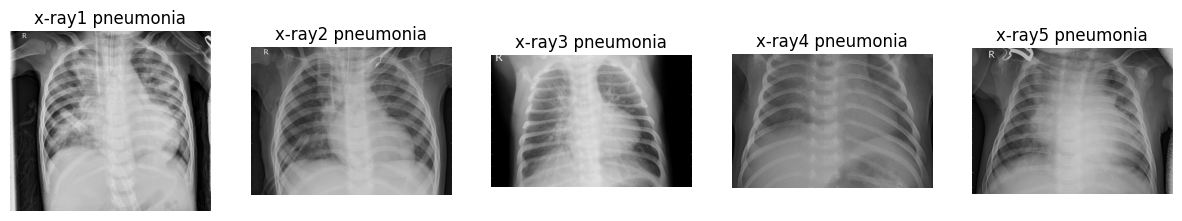

In [4]:
show_image(
    path = fr"./dataset/train/PNEUMONIA",
    category = "PNEUMONIA",
    n = 5
)

<h3>2.2 Preprocessing the training set:</h3>

<p>In order to create a CNN model that can classify images in general, we need to first get images in order to train and test our future model. For that, we will create a generator that will help us rescale and change these images.</p>

In [5]:
train_data_generator = ImageDataGenerator(
    rescale = 1/255, 
    shear_range = .2,
    zoom_range = .2,
    horizontal_flip = True
)

path = r"./dataset/train"

training_set = train_data_generator.flow_from_directory(
    path,
    target_size = (64, 64),
    batch_size = 32,
    class_mode = "binary"
)

Found 7315 images belonging to 2 classes.


<h3>2.3 Preprocessing the test set:</h3>

In [6]:
test_data_generator = ImageDataGenerator(
    rescale = 1/255,
)

path = r"./dataset/test"

test_set = test_data_generator.flow_from_directory(
    path,
    target_size = (64, 64),
    batch_size = 32,
    class_mode = "binary"
)

Found 620 images belonging to 2 classes.


<h2>3. Creating the CNN</h2>

<p>Here, we will create and configure a CNN model with 2 convolution layers.</p>

In [7]:
model = Sequential([
    Conv2D(
        filters = 32,
        kernel_size = 3,
        activation = "relu",
        input_shape = [64, 64, 3]
    ),
    MaxPool2D(
        pool_size = 2,
        strides = 2
    ),

    Conv2D(
        filters = 32,
        kernel_size = 3,
        activation = "relu"
    ),
    MaxPool2D(
        pool_size = 2,
        strides = 2
    ),

    Flatten(),

    Dense(
        units = 128,
        activation = "relu"
    ),

    Dense(
        units = 1,
        activation = "sigmoid"
    )
])

model.summary()

C:\Users\tulio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 813,217 (3.10 MB)

 Trainable params: 813,217 (3.10 MB)

 Non-trainable params: 0 (0.00 B)

<h2>4. Training the CNN model</h2>

<h3>4.1 Training:</h3>

<p>Finally, we will train the model with 25 epochs.</p>


In [8]:
model.compile(
    optimizer = "adam",
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

history = model.fit(
    x = training_set,
    validation_data = test_set,
    epochs = 25
)

C:\Users\tulio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
229/229 ━━━━━━━━━━━━━━━━━━━━ 84s 359ms/step - accuracy: 0.7876 - loss: 0.4464 - val_accuracy: 0.9258 - val_loss: 0.1856
Epoch 2/25
229/229 ━━━━━━━━━━━━━━━━━━━━ 78s 341ms/step - accuracy: 0.8936 - loss: 0.2570 - val_accuracy: 0.9016 - val_loss: 0.2267
Epoch 3/25
229/229 ━━━━━━━━━━━━━━━━━━━━ 77s 335ms/step - accuracy: 0.9126 - loss: 0.2219 - val_accuracy: 0.8919 - val_loss: 0.2432
Epoch 4/25
229/229 ━━━━━━━━━━━━━━━━━━━━ 79s 347ms/step - accuracy: 0.9071 - loss: 0.2346 - val_accuracy: 0.9403 - val_loss: 0.1685
Epoch 5/25
229/229 ━━━━━━━━━━━━━━━━━━━━ 78s 340ms/step - accuracy: 0.9204 - loss: 0.1975 - val_accuracy: 0.9339 - val_loss: 0.1681
Epoch 6/25
229/229 ━━━━━━━━━━━━━━━━━━━━ 78s 339ms/step - accuracy: 0.9288 - loss: 0.1888 - val_accuracy: 0.9484 - val_loss: 0.1363
Epoch 7/25
229/229 ━━━━━━━━━━━━━━━━━━━━ 77s 336ms/step - accuracy: 0.9346 - loss: 0.1775 - val_accuracy: 0.9532 - val_loss: 0.1396
Epoch 8/25
229/229 ━━━━━━━━━━━━━━━━━━━━ 77s 337ms/step - accuracy: 0.9324 - loss: 0

<h4>Visualising the history</h4>

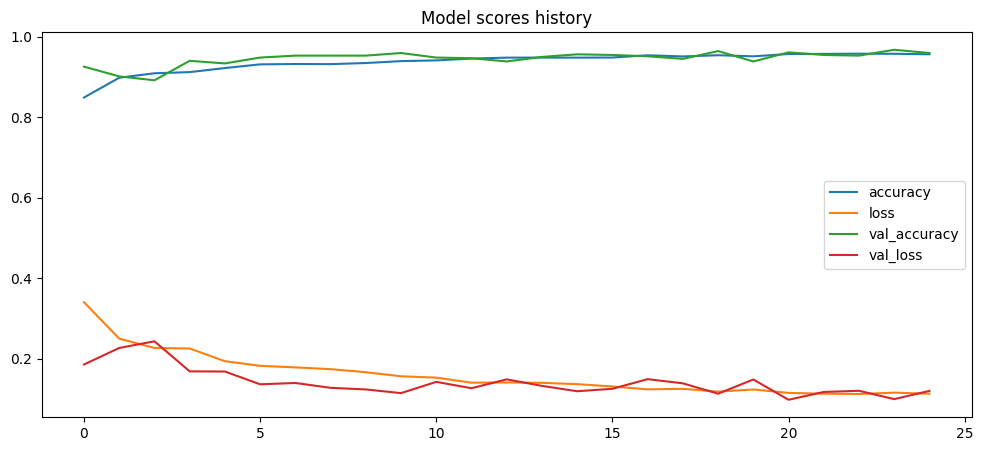

In [28]:
pd.DataFrame(
    history.history
    ).plot(
        figsize=[12,5]
    )
plt.title("Model scores history")
plt.show()

<h3>4.2 About the results:</h3>

<p>In the end, after 25 generations, this model has:</p>

<ol>
    <li>Accuracy: <b>95.05%</b>;</li>
    <li>Loss: <b>12.80%</b>;</li>
</ol>

<p>With these scores, we created a very good machine learning CNN model capable of finding pneumonia by looking to x-ray chest images. The results are good enough to make this model capable to participate in real diagnosis.</p>

<p>Thus, these are the consequences:</p>

<ul>
    <li>Speeding: we could easly take any x-ray chest pictures and deliver fasts diagnosis;</li>
    <li>Accuracy: the accuracy is good or even better than real life diagnosis;</li>
    <li>No human interventions: this model could support doctors to help their patients more effectly by saving time and effort;</li>
</ul>

<h2>5. Making predictions</h2>

<p>Just to feel the potential of this model, we will predict pneumonia cases by analising some x-ray images. For that, we will create another function called <code>predict_image</code>.</p>

<h3>5.1 <code>predict_image</code></h3>

In [29]:
def predict_image(path, category, n):

    test_image = image.load_img(
        fr"{path}/{category}_{n}.jpeg",
        target_size = (64, 64)
    )

    test_image = image.img_to_array(
        test_image
    )

    test_image = np.expand_dims(
        test_image,
        axis = 0
    )

    result = model.predict(
        test_image/255
    )

    if result[0][0] <= 0.5: status = "healthy"
    else: status = "pneumonia"
    
    result_dict = {
        "image": f"{category}_{n}.jpeg",
        "result": np.round(result[0][0], decimals = 0),
        "status": status,
    }

    return pd.DataFrame(result_dict, index = [n])

<h3>5.2 For healthy lungs:</h3>

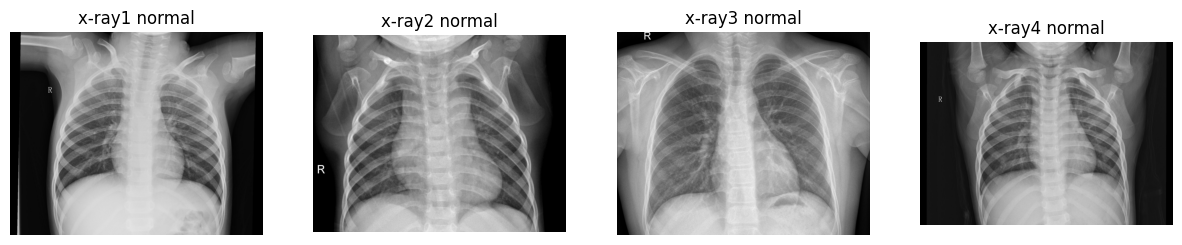

In [11]:
#Here, we show our NORMAL lungh images
show_image(
    path = fr"./dataset/pred/NORMAL",
    category = "NORMAL",
    n = 4
)

In [30]:
healthy_dataset = pd.DataFrame()

for i in range (0, 4):

    healthy_dataset = pd.concat(
        [
            healthy_dataset,
            predict_image(
                path = "./dataset/pred/NORMAL",
                category = "NORMAL",
                n = i
            )
        ]
    )

display(healthy_dataset)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


,image,result,status
0,NORMAL_0.jpeg,0.0,healthy
1,NORMAL_1.jpeg,0.0,healthy
2,NORMAL_2.jpeg,0.0,healthy
3,NORMAL_3.jpeg,0.0,healthy


<h3>5.3 For unhealthy lungs:</h3>

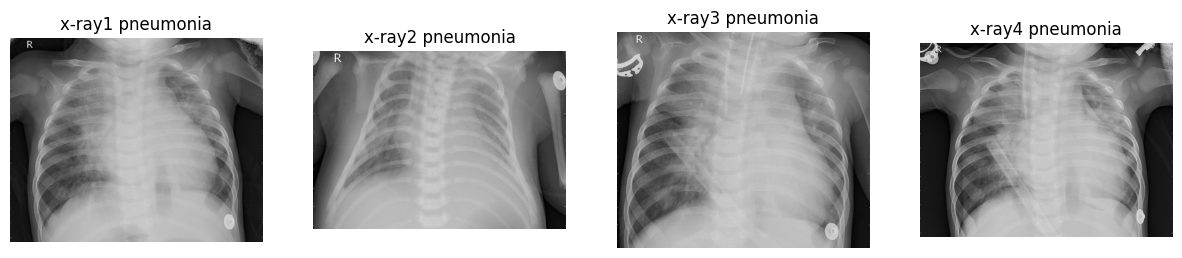

In [13]:
#Here, we show our lungh with pneumonia images
show_image(
    path = fr"./dataset/pred/PNEUMONIA",
    category = "PNEUMONIA",
    n = 4
)

In [35]:
unhealthy_dataset = pd.DataFrame()

for i in range (0, 4):

    unhealthy_dataset = pd.concat(
        [
            unhealthy_dataset,
            predict_image(
                path = "./dataset/pred/PNEUMONIA",
                category = "PNEUMONIA",
                n = i
            )
        ]
    )

display(unhealthy_dataset)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


,image,result,status
0,PNEUMONIA_0.jpeg,1.0,pneumonia
1,PNEUMONIA_1.jpeg,1.0,pneumonia
2,PNEUMONIA_2.jpeg,1.0,pneumonia
3,PNEUMONIA_3.jpeg,1.0,pneumonia


C:\Users\tulio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


<p>Then, our model was right in 100% in cases where there is or isn't pneumonia.</p>

<h3>5.4 Analising the whole test set</h3>

<p>However, because we really want to understand our model capacity, we are going to visualize the hole prediction based on the test set.</p>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━

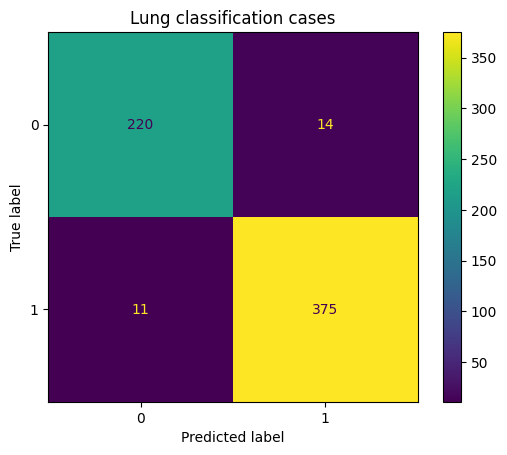

In [56]:
test_dataset = pd.DataFrame()

pred_array = []
true_array = []

for order, case in enumerate(["NORMAL", "PNEUMONIA"]):

    for arquive in pathlib.Path(fr"./dataset/test/{case}").iterdir():

        new_image = image.load_img(
            arquive,
            target_size = (64, 64)
        )

        new_image = image.img_to_array(
            new_image
        )

        new_image = np.expand_dims(
            new_image,
            axis = 0
        )

        result = model.predict(
            new_image/255
        )[0][0]

        #Here, we save our predict and true result 
        pred_array.append(
            np.round(
                a = result,
                decimals = 0
            )
        )
        true_array.append(order)

confusion_matrix_plot = ConfusionMatrixDisplay(
        confusion_matrix = confusion_matrix(
            y_pred = pred_array,
            y_true = true_array
        ),
        display_labels = [0, 1]
    )

confusion_matrix_plot.plot()
plt.title("Lung classification cases")
plt.show()

<p>After this, our model could detect:</p>

<ul>
    <li>Normal cases with: 94.02% accuracy;</li>
    <li>Pneumonial cases with: 97.15% accuracy;</li>
    <li>For nomal and pneumonial cases, our model was able to have 95.97% accuracy;</li>
</ul>

<h2>6. Exporting the model</h2>

<p>In the end, we are going to save this model in order to reuse it later eventually.</p>

In [15]:
joblib.dump(
    value = model,
    filename = "pneumonia_recognition_model.joblib"
)

['pneumonia_ recognition_model.joblib']